<h1>The Bike Challenge</h1>

<h2>Objectives of this exercise</h2>
  <body>   1. Calculate the average trip times from station-to-station journeys.<br>
       2. Visualise the average trip times of the different journeys.<br>
       3. Refine the results of anomalies.<br></body>
<body>During this exercise, we presume that anomalies consist of bike trips which are under 2 minutes, and above 8 hours. furthermore, there are other factors affecting the results including peoples preference to take other modes of transport after the first lockdown and the public bike system being restricted to only those deemed essential workers for a short period.</body> 

In [384]:
##universal imports
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.dates as mdates


#Pandas Options for changing display
pd.set_option('display.max_rows', None)

In [385]:
##Create bike dataframes by reading the appropriate file.
bike_df = pd.read_csv('bbike-journeys-01/bbike_journey_level_2020_2021.csv')
#Describe highlights a set of valuable details about the dataframe.
bike_df.describe()

,bike_number,trip_time_mins
count,111427.000000,111427.000000
mean,436737.407065,124.970439
std,373022.517849,963.105339
min,82828.000000,0.076998
25%,83078.000000,5.998671
50%,83434.000000,13.001274
75%,830191.000000,38.909904
max,998499.000000,45043.006968


In [386]:
## calculate amount of journeys per date.
bike_df['count'] = 1
journeys_by_date = bike_df[['date', 'count']].groupby(['date']).sum().reset_index()
journeys_by_date

,date,count
0,2019-12-30,390
1,2019-12-31,246
2,2020-01-01,134
3,2020-01-02,123
4,2020-01-03,170
5,2020-01-04,142
6,2020-01-05,67
7,2020-01-06,218
8,2020-01-07,307
9,2020-01-08,313


<h2> visualising the journeys taken per day</h2>

<body>The line chart below displays the count of travels(Y-axis) against the Dates of Travel(X-axis) per day. Easier to visualise than scouring a table to compare the values per month.</body>

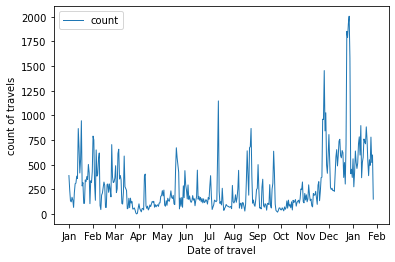

In [387]:
##Plot a graph using Matplotlib.
ax = journeys_by_date.plot(lw = 1)
ax.set_xlabel("Date of travel")
ax.set_ylabel("count of travels")
#set xlabel tick to every month.
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

<h3>Visualising the same data removing anomalies</h3>

<body>It's unlikely that any trips that took under 2 minutes are trips to work, it is more likely that the person got on the bike, noticed it had a loose tire or deflated wheel and returned it immediately. Furthermore, if a person was to take a sub two minute bike ride it is likely they decided to walk rather than travelling such short distance to the nearest back rack etc. <br>
trips over 8 hours can be discounted also, these values in the table likely that these appear as an engineer has taken the bike for repair or maintenance, or even that the bike may have been lost or stolen.<br>
Trips that are for leasure are more likely to be returned to the same station as they departed, a person will not leave for work to return to the same place after rental, the bike will be returned to the station nearest their place of work. these results can be removed to find which trips are more likely taken by people heading for their work.</body>

In [388]:
##refine dataframe by removing outstanding values.
refined_df = bike_df[(bike_df.trip_time_mins > 2.00) & (bike_df.trip_time_mins < 480)]
refined_df.describe()

,bike_number,trip_time_mins,count
count,86960.000000,86960.000000,86960.0
mean,495160.942893,39.029581,1.0
std,371564.461066,54.664995,0.0
min,82828.000000,2.000004,1.0
25%,83122.000000,9.990063,1.0
50%,830035.000000,16.989471,1.0
75%,830226.000000,46.993719,1.0
max,830448.000000,479.984903,1.0


In [389]:
##Calculate and Display the count of travels per day of the refined DF.
refined_journey_by_date = refined_df[['date', 'count']].groupby(['date']).sum().reset_index()
refined_journey_by_date

,date,count
0,2019-12-30,139
1,2019-12-31,46
2,2020-01-01,53
3,2020-01-02,98
4,2020-01-03,113
5,2020-01-04,103
6,2020-01-05,55
7,2020-01-06,176
8,2020-01-07,284
9,2020-01-08,287


<body>The refined graph below is useful as it shows a refined graph which does not include any of the values which we declared as anomalies, making the graph appear much 'smoother'.<body>

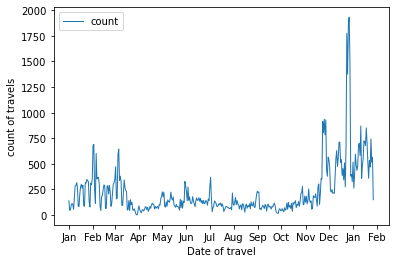

In [390]:
##Display refined Graph.
ax = refined_journey_by_date.plot(lw = 1)
ax.set_xlabel("Date of travel")
ax.set_ylabel("count of travels")
#set xlabel tick to every month.
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

<h3>Removing trips to and from the same station</h3>

<body>Another reduction that can be made from the data would be bike travel which ended at the same station, this would help to find the trips which were more likely to be taken by the workers who used the bike system to travel to their place of work, rather than taking a leisurely ride to return to the same destination.</body>

In [391]:
essential_travel_df = bike_df[(bike_df.station_from != bike_df.station_to)]
essential_travel_df.describe()

,bike_number,trip_time_mins,count
count,111427.000000,111427.000000,111427.0
mean,436737.407065,124.970439,1.0
std,373022.517849,963.105339,0.0
min,82828.000000,0.076998,1.0
25%,83078.000000,5.998671,1.0
50%,83434.000000,13.001274,1.0
75%,830191.000000,38.909904,1.0
max,998499.000000,45043.006968,1.0


<body>all recorded trips begin and end at different stations, shown in this description as the row count is equal to that of the original table, suggesting that these leisurely trips were uncommon, and atleast for leisure trips, they were to different locations.</body>

<h2>Common stations before, during and after lockdown</h2>

<body>This chapter of the exercise explores the popular station-to-station travels at before, during, and after the first lockdown to spot a trend in how the destinationsof travel have changed.<br>
This assumes that the lockdown began on 23rd of March 2020 and was dismissed on the 12th of June which is when the non-essential shops opened, however, social distancing and guidance was still in place.</body>

In [392]:
##first, calculate trips from stations before the lockdown.
#Using Describe and adding the Count of each of these new dataframes equals the total count of rows in refined_df

before_df = refined_df[refined_df.date <= '2020-03-23']
during_df = refined_df[(refined_df.date > '2020-03-23') & (refined_df.date <= '2020-06-12')]
after_df = refined_df[refined_df.date > '2020-06-12']

In [393]:
# stations = refined_df['station_from'].unique()
# sorted(stations)

In [394]:
##calculate count of travels from certain stations
journeys_from_before = before_df[['station_from', 'count']].groupby(['station_from']).sum().reset_index()
journeys_from_during = during_df[['station_from', 'count']].groupby(['station_from']).sum().reset_index()
journeys_from_after = after_df[['station_from', 'count']].groupby(['station_from']).sum().reset_index()

Text(0, 0.5, 'count of travels')

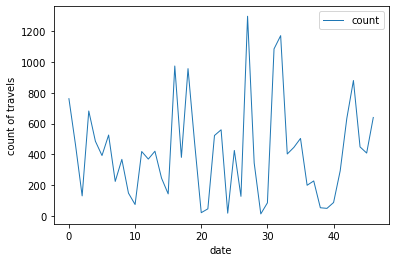

In [400]:
##Display refined Graph of before.
ax = journeys_from_before.plot(lw = 1)
ax.set_xlabel("date")
ax.set_ylabel("count of travels")

Text(0, 0.5, 'count of travels')

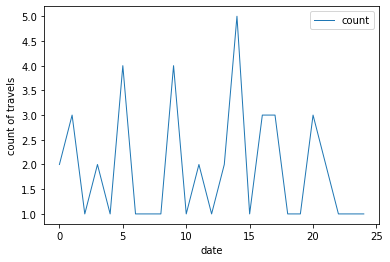

In [398]:
##Display refined Graph of during.
ax = journeys_from_during.plot(lw = 1)
ax.set_xlabel("date")
ax.set_ylabel("count of travels")

Text(0, 0.5, 'count of travels')

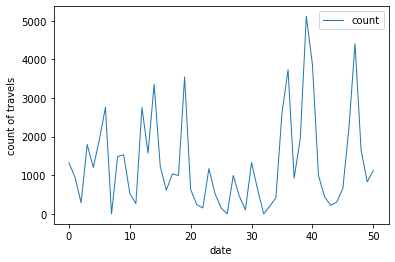

In [399]:
##Display refined Graph of After.
ax = journeys_from_after.plot(lw = 1)
ax.set_xlabel("date")
ax.set_ylabel("count of travels")